In [16]:
# imports
import pandas as pd
import os
import kagglehub
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy

# import kaggle 

In [49]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install powerlaw

Note: you may need to restart the kernel to use updated packages.


In [53]:
# imports
import pandas as pd
# import os
# import kagglehub
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import scipy

# import kaggle 

In [54]:
import pickle

with open("edges_df_sorted.pk1", "rb") as f:
    edges_df_sorted = pickle.load(f)

with open("edges_df.pk1", "rb") as f:
    edges_df = pickle.load(f)
    
with open("df_aggregated.pk1", "rb") as f:
    df_aggregated = pickle.load(f)




In [55]:
edges_df

,Disease1,Disease2,Weight
0,abdominal aortic aneurysm,abdominal hernia,0.129099
1,abdominal aortic aneurysm,abscess of the lung,0.204124
2,abdominal aortic aneurysm,acute bronchiolitis,0.117851
3,abdominal aortic aneurysm,acute bronchitis,0.117851
4,abdominal aortic aneurysm,acute bronchospasm,0.123091
...,...,...,...
66556,white blood cell disease,whooping cough,0.298142
66557,white blood cell disease,wilson disease,0.192450
66558,white blood cell disease,yeast infection,0.111111
66559,whooping cough,wilson disease,0.258199


In [56]:
G = nx.Graph()

for _, row in edges_df.iterrows():
    G.add_edge(row["Disease1"], row["Disease2"], weight=row["Weight"])


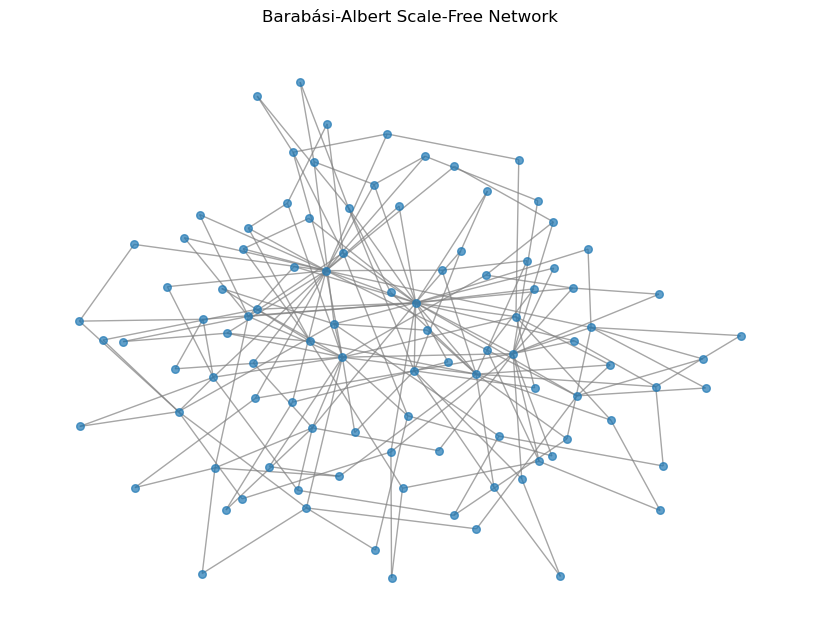

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

# scale-free network 
n = 100  # Number of nodes
m = 2    # Number of edges to attach from a new node to existing nodes

GSF= nx.barabasi_albert_graph(n, m)

plt.figure(figsize=(8, 6))
nx.draw(GSF, node_size=30, edge_color="gray", alpha=0.7)
plt.title("Barabási-Albert Scale-Free Network")
plt.show()

# The network has a small number of highly connected nodes (hubs) and many nodes with few connections.
# This follows the scale-free property, meaning the degree distribution follows a power law.


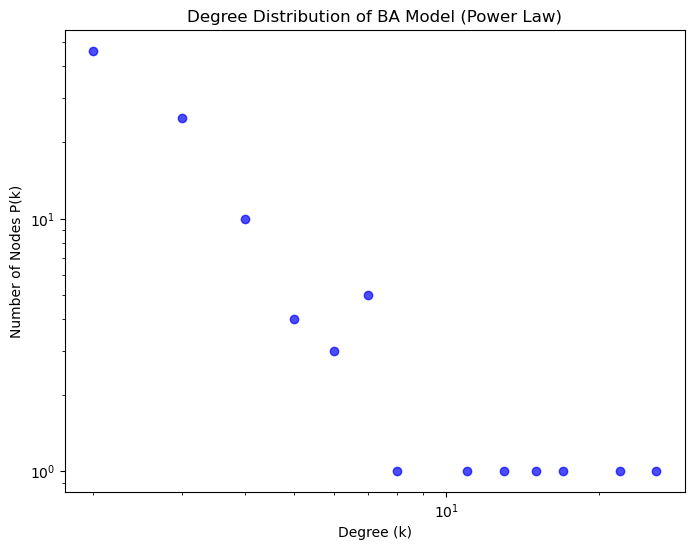

In [58]:
import numpy as np

# degree distribution
degree_sequence = [d for n, d in GSF.degree()]
unique_degrees, counts = np.unique(degree_sequence, return_counts=True)

# log-log
plt.figure(figsize=(8, 6))
plt.scatter(unique_degrees, counts, color="blue", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (k)")
plt.ylabel("Number of Nodes P(k)")
plt.title("Degree Distribution of BA Model (Power Law)")
plt.show()
#plot will direct plot raw degree counts without binning
#raw degree distribution has a downward slope, so resembles scale free property


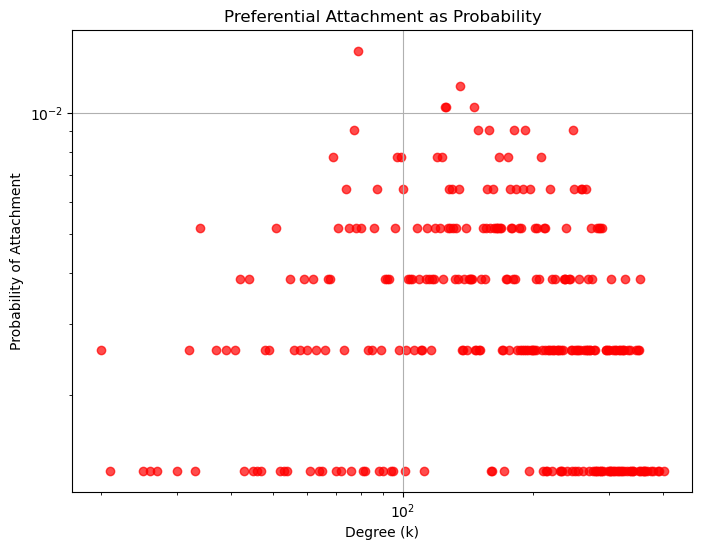

In [59]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

#degree of all nodes in the graph
degree_sequence = [d for n, d in G.degree()]

# how often each degree appears
attachment_count = Counter(degree_sequence)  

# Normalize to get probability of attachment per degree
total_attachments = sum(attachment_count.values())
attachment_prob = {k: v / total_attachments for k, v in attachment_count.items()}

plt.figure(figsize=(8, 6))
plt.scatter(list(attachment_prob.keys()), list(attachment_prob.values()), color="red", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (k)")
plt.ylabel("Probability of Attachment")
plt.title("Preferential Attachment as Probability")
plt.grid(True)
plt.show()





Calculating best minimal value for power law fit


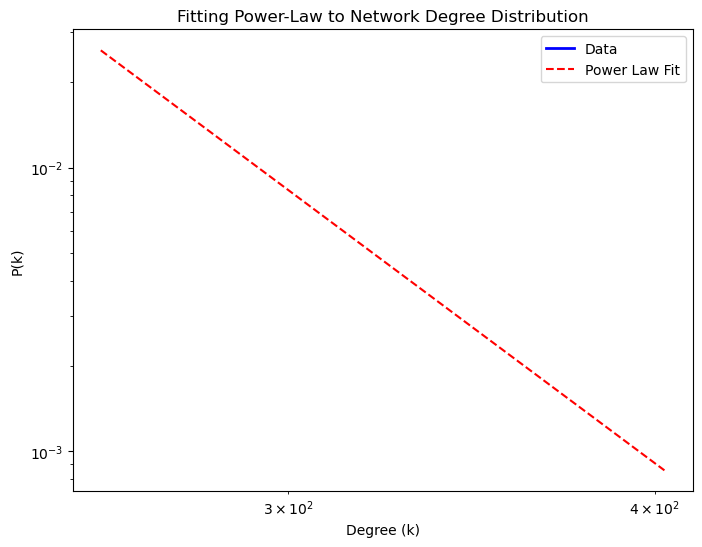

Estimated alpha (scale exponent): 7.712017911160165
Goodness-of-fit (KS test) p-value: 0.10051910954162901


In [60]:
import powerlaw

# Fit power law distribution to degree sequence
fit = powerlaw.Fit(degree_sequence)
#the fit powerlaw methods and packages use log log scale by default

plt.figure(figsize=(8, 6))
fit.plot_pdf(color='b', linewidth=2, label="Data")
fit.power_law.plot_pdf(color='r', linestyle="--", label="Power Law Fit")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Fitting Power-Law to Network Degree Distribution")
plt.legend()
plt.show()

print(f"Estimated alpha (scale exponent): {fit.alpha}")
print(f"Goodness-of-fit (KS test) p-value: {fit.power_law.KS()}")





In [52]:
import numpy as np

# approx power-law exponent using log-log regression
degrees = np.array(unique_degrees)
counts = np.array(counts)

log_degrees = np.log(degrees)
log_counts = np.log(counts)

# Linear regression (log-log) to estimate slope
slope, intercept = np.polyfit(log_degrees, log_counts, 1)

print(f"Estimated Power-Law Exponent (α): {-slope}")


Estimated Power-Law Exponent (α): 1.577524536496934


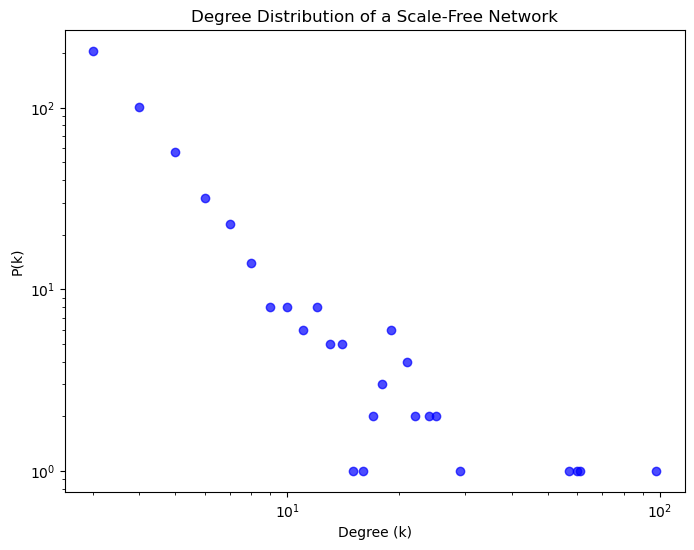

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# scale-free network using the Barabási-Albert model
n = 500  # Number of nodes
m = 3    # Number of edges per new node
GSF = nx.barabasi_albert_graph(n, m)

# degree distribution
degree_sequence = [d for n, d in GSF.degree()]
unique_degrees, counts = np.unique(degree_sequence, return_counts=True)

# log-log scale
plt.figure(figsize=(8, 6))
plt.scatter(unique_degrees, counts, color="blue", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution of a Scale-Free Network")
plt.show()


In [ ]:
#small number of nodes, high degrees, most nodes have few. Consistent with preferential attachment, where high degree nodes continue to attract connections
#degree distribution follows the power law
#log log plot shows a clear downward trend, so that checks out with a scale-free network
#few diseases /hubs share symptoms with many other diseases, and most diseases only connect to a few
#Estimated alpha (scale exponent): 3.291207260770127
# exponent confirms scale free exponent
#


In [45]:
assortativity = nx.degree_pearson_correlation_coefficient(G)
print("Assortativity Coefficient (r):", assortativity)

#assortivity coefficient is positive


Assortativity Coefficient (r): 0.2158004136415996


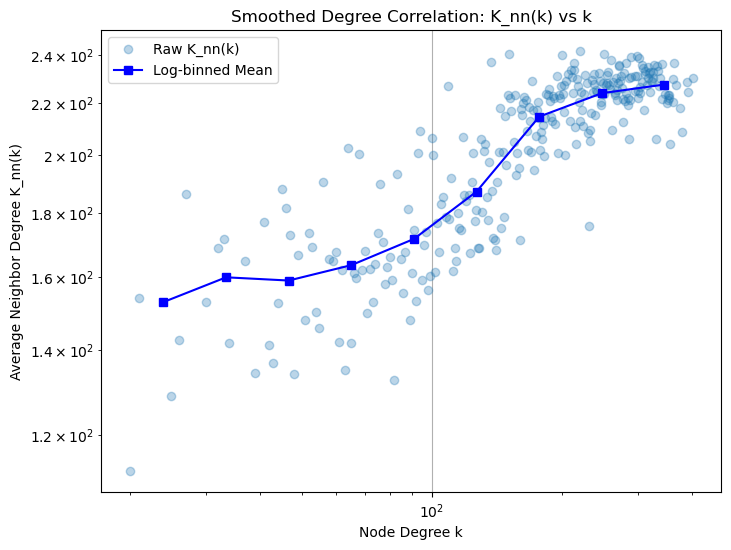

In [46]:
knn = nx.average_degree_connectivity(G)

import numpy as np
from scipy.stats import binned_statistic

# Prepare data
degrees = np.array(list(knn.keys()))
knn_values = np.array(list(knn.values()))

# Create log-spaced bins
log_bins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), num=10)
bin_means, bin_edges, _ = binned_statistic(degrees, knn_values, statistic='mean', bins=log_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot
plt.figure(figsize=(8, 6))
plt.plot(degrees, knn_values, 'o', alpha=0.3, label='Raw K_nn(k)')
plt.plot(bin_centers, bin_means, 's-', color='blue', label='Log-binned Mean')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Node Degree k')
plt.ylabel('Average Neighbor Degree K_nn(k)')
plt.title('Smoothed Degree Correlation: K_nn(k) vs k')
plt.legend()
plt.grid(True)
plt.show()


#clear increasing trend
#high degree nodes connected to high degree neighbors
#

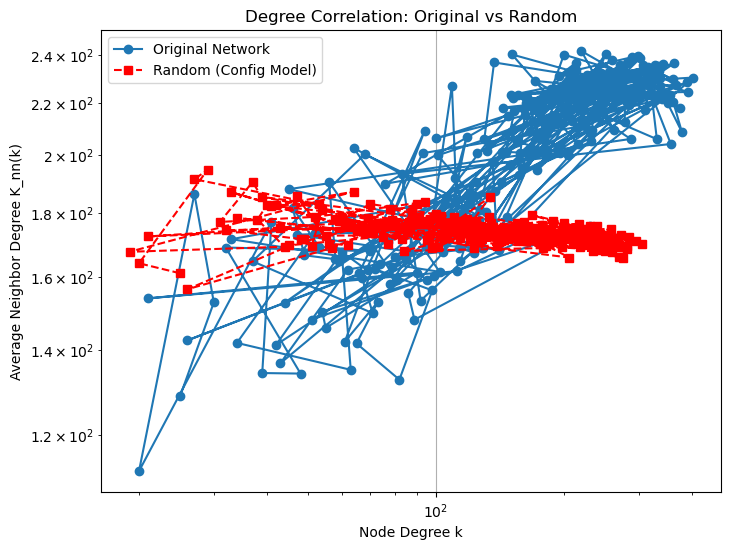

In [47]:
# Generate a configuration model with the same degree distribution
degree_seq = [d for n, d in G.degree()]
G_random = nx.configuration_model(degree_seq)
G_random = nx.Graph(G_random)  # Remove parallel edges and self-loops
G_random.remove_edges_from(nx.selfloop_edges(G_random))

# Compute Knn for the random network
knn_random = nx.average_degree_connectivity(G_random)

# Plot comparison
plt.figure(figsize=(8, 6))
plt.plot(knn.keys(), knn.values(), 'o-', label='Original Network')
plt.plot(knn_random.keys(), knn_random.values(), 's--', label='Random (Config Model)', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Node Degree k')
plt.ylabel('Average Neighbor Degree K_nn(k)')
plt.title('Degree Correlation: Original vs Random')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#if preferential attachment:
# new nodes prefer to connect to existing nodes with higher degree
# hub nodes created over time, so they have high degree
# leads to power law degree distribution
# like a new disease with only a few symptom is more likely to share symptoms with an already common disease
# implies dissortivity bc new low degree nodes will attach to existing high degree nodes
# would result in few hubs connected to many spokes
#in dissortivity: high degree nodes tend to be connected to low degree nodes

# in BA model, assortivity coefficient r is negative. Avg neighbour degree decreases with k